In [1215]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

heart_disease_df = pd.read_csv('heart_disease.csv')
heart_disease_df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [1216]:
display(heart_disease_df.info())
display(heart_disease_df.isnull().sum()/len(heart_disease_df))
display(heart_disease_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


None

id          0.000000
age         0.000000
sex         0.000000
dataset     0.000000
cp          0.000000
trestbps    0.064130
chol        0.032609
fbs         0.097826
restecg     0.002174
thalch      0.059783
exang       0.059783
oldpeak     0.067391
slope       0.335870
ca          0.664130
thal        0.528261
dtype: float64

,id,age,trestbps,chol,thalch,oldpeak,ca
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000
mean,459.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653
min,0.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,229.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000
50%,459.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000
75%,689.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000
max,919.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000


In [1217]:
X = heart_disease_df.drop(['id', 'dataset', 'slope', 'thal', 'ca'], axis=1)
display(X.isna().sum() / len(X))
X.shape

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.064130
chol        0.032609
fbs         0.097826
restecg     0.002174
thalch      0.059783
exang       0.059783
oldpeak     0.067391
dtype: float64

(920, 10)

In [1218]:
X_num = X.select_dtypes(include='number')
X_cat = X.select_dtypes(include='object')

In [1219]:
display(X_num.isna().sum() / len(X_num))
display(X_num.describe())

age         0.000000
trestbps    0.064130
chol        0.032609
thalch      0.059783
oldpeak     0.067391
dtype: float64

,age,trestbps,chol,thalch,oldpeak
count,920.000000,861.000000,890.000000,865.000000,858.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788
std,9.424685,19.066070,110.780810,25.926276,1.091226
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,175.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000
75%,60.000000,140.000000,268.000000,157.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [1220]:
from sklearn.impute import SimpleImputer
impute_num = SimpleImputer(strategy='median')
X_num = pd.DataFrame(impute_num.fit_transform(X_num))

In [1221]:
X_num.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [1222]:
display(X_cat)
display(X_cat['cp'].unique()) 
display(X_cat['restecg'].unique()) 

,sex,cp,fbs,restecg,exang
0,Male,typical angina,True,lv hypertrophy,False
1,Male,asymptomatic,False,lv hypertrophy,True
2,Male,asymptomatic,False,lv hypertrophy,True
3,Male,non-anginal,False,normal,False
4,Female,atypical angina,False,lv hypertrophy,False
...,...,...,...,...,...
915,Female,asymptomatic,True,st-t abnormality,False
916,Male,typical angina,False,st-t abnormality,NaN
917,Male,asymptomatic,True,st-t abnormality,False
918,Male,asymptomatic,True,lv hypertrophy,NaN


array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

array(['lv hypertrophy', 'normal', 'st-t abnormality', nan], dtype=object)

In [1223]:
display(X_cat.isna().sum() / len(X_cat))
display(X_cat.shape)


sex        0.000000
cp         0.000000
fbs        0.097826
restecg    0.002174
exang      0.059783
dtype: float64

(920, 5)

In [1224]:
display(X_cat['fbs'].value_counts(normalize=True))
display(X_cat['exang'].value_counts(normalize=True))

fbs
False    0.833735
True     0.166265
Name: proportion, dtype: float64

exang
False    0.610405
True     0.389595
Name: proportion, dtype: float64

In [1225]:
np.random.seed(42)
proba_fbs = X_cat['fbs'].value_counts(normalize=True)
X_cat_fbs = X_cat['fbs'].apply(lambda x: bool(np.random.choice([False, True], p=proba_fbs.values)) if pd.isnull(x) else x)
X_cat['fbs'] = X_cat_fbs

In [1226]:
proba_exang = X_cat['exang'].value_counts(normalize=True)
X_cat_exang = X_cat['exang'].apply(lambda x: bool(np.random.choice([False, True], p=proba_exang.values)) if pd.isnull(x) else x)
X_cat['exang'] = X_cat_exang

In [1227]:
display(X_cat['fbs'].value_counts(normalize=True))
display(X_cat['exang'].value_counts(normalize=True))

fbs
False    0.83587
True     0.16413
Name: proportion, dtype: float64

exang
False    0.611957
True     0.388043
Name: proportion, dtype: float64

In [1228]:
X_cat

,sex,cp,fbs,restecg,exang
0,Male,typical angina,True,lv hypertrophy,False
1,Male,asymptomatic,False,lv hypertrophy,True
2,Male,asymptomatic,False,lv hypertrophy,True
3,Male,non-anginal,False,normal,False
4,Female,atypical angina,False,lv hypertrophy,False
...,...,...,...,...,...
915,Female,asymptomatic,True,st-t abnormality,False
916,Male,typical angina,False,st-t abnormality,False
917,Male,asymptomatic,True,st-t abnormality,False
918,Male,asymptomatic,True,lv hypertrophy,False


In [1229]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
X_cat_en = OrdinalEncoder().fit_transform(X_cat)
X_cat = pd.DataFrame(X_cat_en)

In [1230]:
X_cat

,0,1,2,3,4
0,1.0,3.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,2.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
915,0.0,0.0,1.0,2.0,0.0
916,1.0,3.0,0.0,2.0,0.0
917,1.0,0.0,1.0,2.0,0.0
918,1.0,0.0,1.0,0.0,0.0


In [1231]:
#X_cat = X_cat.dropna()

In [1232]:
X_cat.isna().sum()

0    0
1    0
2    0
3    2
4    0
dtype: int64

In [1233]:
# test later
#from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

#X_cat_ord = X_cat[['cp','restecg']]
#X_cat_one_hot = X_cat.drop(['cp', 'restecg'], axis=1)

#print(X_cat_ord.shape)
#print(X_cat_one_hot.shape)

#lab_encoder = OrdinalEncoder()
#X_cat_oh_encoded = lab_encoder.fit_transform(X_cat.drop(['cp', 'restecg'], axis=1))
#X_cat_one_hot = pd.DataFrame( X_cat_oh_encoded, 
#                             columns=lab_encoder.get_feature_names_out(X_cat.drop(['cp', 'restecg'], axis=1).columns),
#                             index=X_cat.drop(['cp', 'restecg'], axis=1).index)

#print(X_cat_ord.shape)
#print(X_cat_one_hot.shape)


#cp_order = ['typical angina', 'atypical angina', 'non-anginal', 'asymptomatic']
#restecg_oreder = ['normal', 'st-t abnormality', 'lv hypertrophy']

#ord_encoder = OrdinalEncoder(categories=[cp_order, restecg_oreder])
#X_cat_ord_encoded = ord_encoder.fit_transform(X_cat[['cp','restecg']])
#X_cat_ord = pd.DataFrame(X_cat_ord_encoded, 
#                         columns=ord_encoder.get_feature_names_out(['cp','restecg']))

#print(X_cat_ord.shape)
#print(X_cat_one_hot.shape)

In [1234]:
X_num.columns = X.select_dtypes(include='number').columns
X_cat.columns = X.select_dtypes(include='object').columns
#X_num = X_num[:-2]
#X_cat

In [1235]:
X = pd.concat([X_cat, X_num], axis=1)
X = X.dropna()
display(X)
display(X.describe())

,sex,cp,fbs,restecg,exang,age,trestbps,chol,thalch,oldpeak
0,1.0,3.0,1.0,0.0,0.0,63.0,145.0,233.0,150.0,2.3
1,1.0,0.0,0.0,0.0,1.0,67.0,160.0,286.0,108.0,1.5
2,1.0,0.0,0.0,0.0,1.0,67.0,120.0,229.0,129.0,2.6
3,1.0,2.0,0.0,1.0,0.0,37.0,130.0,250.0,187.0,3.5
4,0.0,1.0,0.0,0.0,0.0,41.0,130.0,204.0,172.0,1.4
...,...,...,...,...,...,...,...,...,...,...
915,0.0,0.0,1.0,2.0,0.0,54.0,127.0,333.0,154.0,0.0
916,1.0,3.0,0.0,2.0,0.0,62.0,130.0,139.0,140.0,0.5
917,1.0,0.0,1.0,2.0,0.0,55.0,122.0,223.0,100.0,0.0
918,1.0,0.0,1.0,0.0,0.0,58.0,130.0,385.0,140.0,0.5


,sex,cp,fbs,restecg,exang,age,trestbps,chol,thalch,oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.788671,0.781046,0.164488,0.990196,0.388889,53.530501,132.005447,200.022876,137.676471,0.854902
std,0.408474,0.954236,0.370920,0.632552,0.487764,9.412783,18.460987,108.913893,25.166813,1.058606
min,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,47.000000,120.000000,178.250000,120.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,130.000000,223.000000,140.000000,0.500000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,60.000000,140.000000,266.750000,156.000000,1.500000
max,1.000000,3.000000,1.000000,2.000000,1.000000,77.000000,200.000000,603.000000,202.000000,6.200000


In [1236]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = X.columns
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = cols
X

,sex,cp,fbs,restecg,exang,age,trestbps,chol,thalch,oldpeak
0,0.517644,2.326639,2.253768,-1.566252,-0.797724,1.006574,0.704276,0.302947,0.489941,1.365839
1,0.517644,-0.818950,-0.443701,-1.566252,1.253566,1.431759,1.517244,0.789835,-1.179833,0.609717
2,0.517644,-0.818950,-0.443701,-1.566252,1.253566,1.431759,-0.650669,0.266200,-0.344946,1.649385
3,0.517644,1.278109,-0.443701,0.015507,-0.797724,-1.757133,-0.108691,0.459118,1.960932,2.500024
4,-1.931828,0.229580,-0.443701,-1.566252,-0.797724,-1.331947,-0.108691,0.036536,1.364584,0.515201
...,...,...,...,...,...,...,...,...,...,...
913,-1.931828,-0.818950,2.253768,1.597267,-0.797724,0.049906,-0.271284,1.221604,0.648967,-0.808014
914,0.517644,2.326639,-0.443701,1.597267,-0.797724,0.900277,-0.108691,-0.560591,0.092375,-0.335437
915,0.517644,-0.818950,2.253768,1.597267,-0.797724,0.156202,-0.542273,0.211081,-1.497886,-0.808014
916,0.517644,-0.818950,2.253768,-1.566252,-0.797724,0.475092,-0.108691,1.699305,0.092375,-0.335437


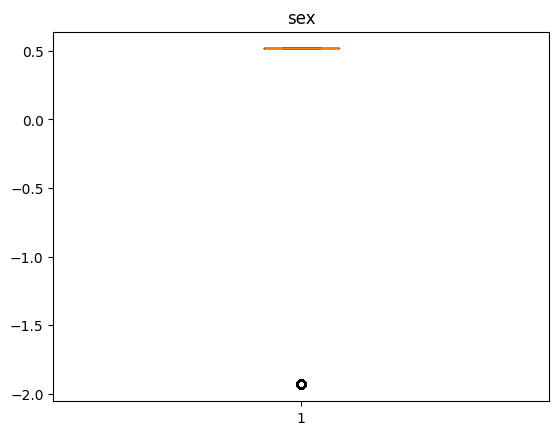

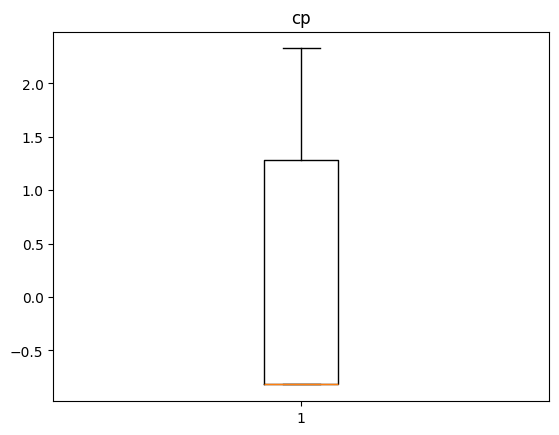

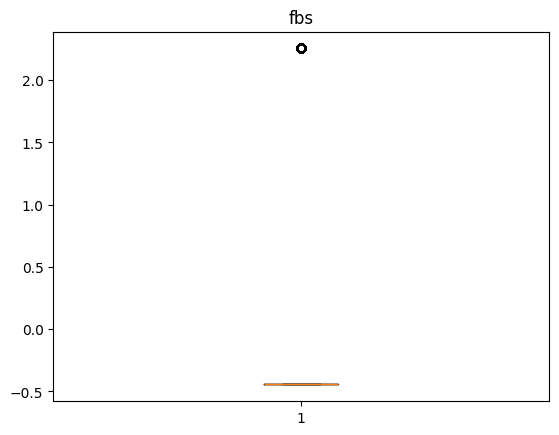

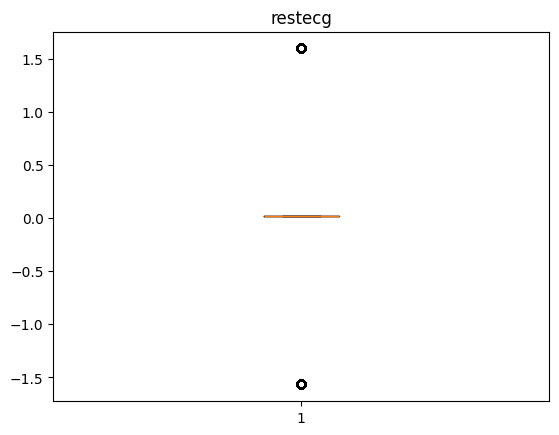

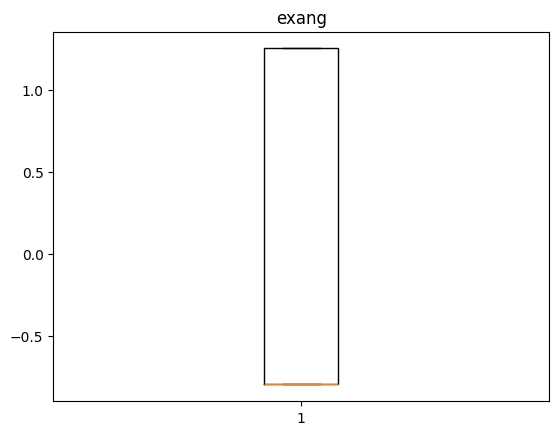

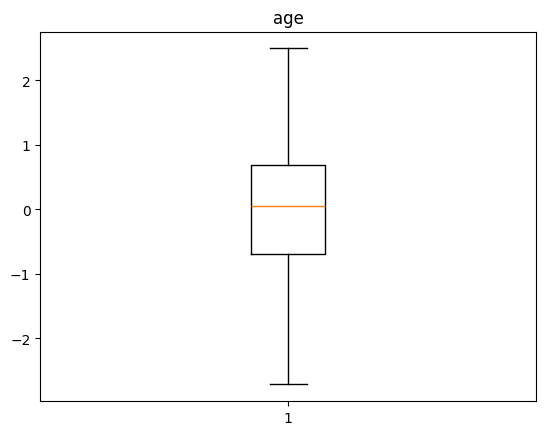

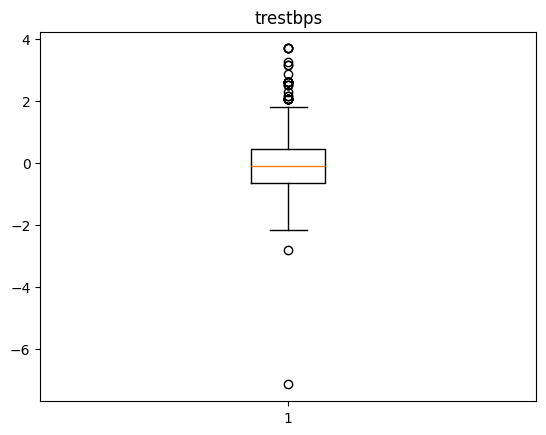

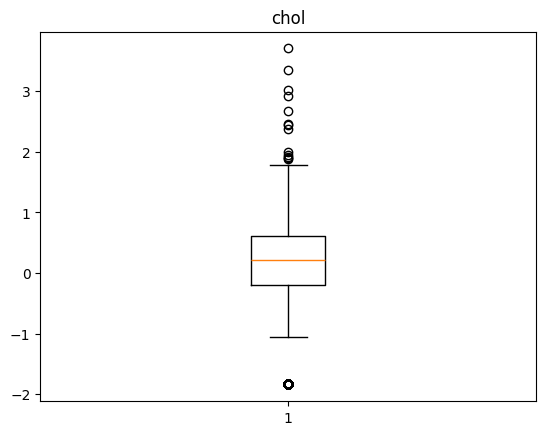

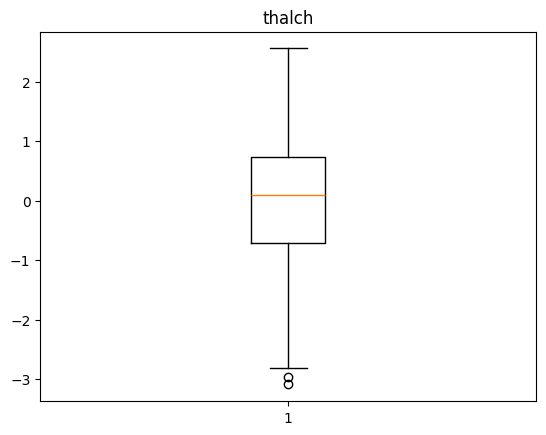

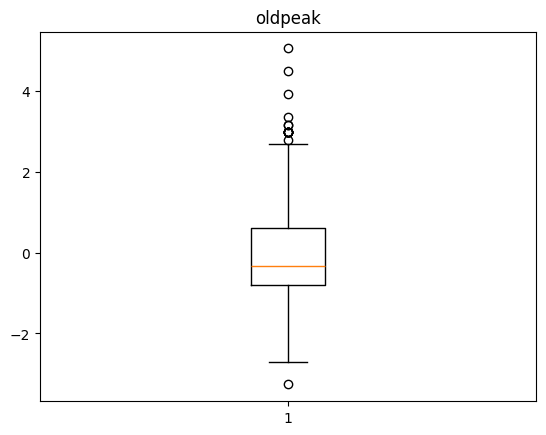

In [1237]:
for col in X.select_dtypes(include='number').columns:
    plt.boxplot(X[col])
    plt.title(col)
    plt.show()

for col in X.columns[-4:]:
    iqr = X[col].quantile(0.75) - X[col].quantile(0.25)
    max = X[col].quantile(0.75) + 1.5 * iqr
    min = X[col].quantile(0.25) - 1.5 * iqr
    X = X[np.logical_and(X[col]>=min, X[col]<=max)]

In [1238]:
X.shape

(689, 10)

In [1239]:
from sklearn.cluster import KMeans

mdl_k_means = KMeans(n_clusters=4)
some_lol = mdl_k_means.fit_predict(X)
X['clusters_kmeans'] = some_lol

In [1240]:
X

,sex,cp,fbs,restecg,exang,age,trestbps,chol,thalch,oldpeak,clusters_kmeans
0,0.517644,2.326639,2.253768,-1.566252,-0.797724,1.006574,0.704276,0.302947,0.489941,1.365839,2
1,0.517644,-0.818950,-0.443701,-1.566252,1.253566,1.431759,1.517244,0.789835,-1.179833,0.609717,1
2,0.517644,-0.818950,-0.443701,-1.566252,1.253566,1.431759,-0.650669,0.266200,-0.344946,1.649385,1
3,0.517644,1.278109,-0.443701,0.015507,-0.797724,-1.757133,-0.108691,0.459118,1.960932,2.500024,3
4,-1.931828,0.229580,-0.443701,-1.566252,-0.797724,-1.331947,-0.108691,0.036536,1.364584,0.515201,0
...,...,...,...,...,...,...,...,...,...,...,...
913,-1.931828,-0.818950,2.253768,1.597267,-0.797724,0.049906,-0.271284,1.221604,0.648967,-0.808014,2
914,0.517644,2.326639,-0.443701,1.597267,-0.797724,0.900277,-0.108691,-0.560591,0.092375,-0.335437,3
915,0.517644,-0.818950,2.253768,1.597267,-0.797724,0.156202,-0.542273,0.211081,-1.497886,-0.808014,2
916,0.517644,-0.818950,2.253768,-1.566252,-0.797724,0.475092,-0.108691,1.699305,0.092375,-0.335437,2


[5866.944947452848, 5037.053010441856, 4195.343920187468, 3676.422817193142, 3459.5521973945765, 3321.196242704318, 3169.4854512492993, 3048.367174983079, 2867.8589999459314, 2814.658024141754]


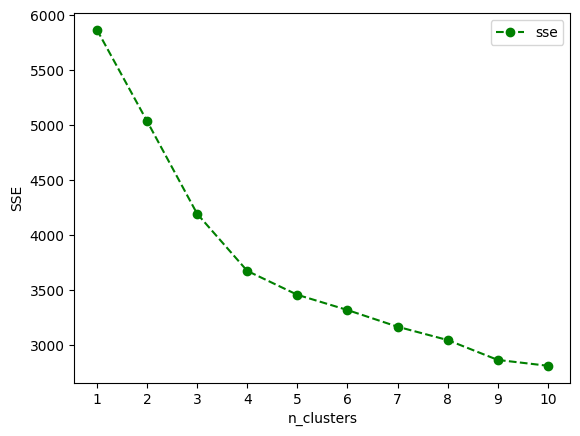

In [1241]:
sse_lst = []
silhouette_score_lst = []
for n_cluster in range(1,11):
    knn = KMeans(n_clusters=n_cluster, random_state=42)
    knn.fit(X.drop('clusters_kmeans', axis=1))
    sse_lst.append(knn.inertia_)
    #silhouette_score_lst.append(silhouette_score(cluster_df[['Feature 1', 'Feature 2']], knn.labels_))

print(sse_lst)
plt.plot(np.array(list(range(1,11))),np.array(sse_lst), 'og--', label='sse')
plt.xticks(np.array(list(range(1,11))))
plt.xlabel('n_clusters')
plt.ylabel('SSE')
plt.legend()

In [1246]:
centers = mdl_k_means.cluster_centers_
centers

array([[-1.93182783,  0.38650277, -0.40700113, -0.15665688, -0.51863691,
        -0.25018247, -0.17210595,  0.41243558,  0.48209761, -0.3257924 ],
       [ 0.42394881, -0.56684406, -0.44370139, -0.02771003,  1.05180007,
         0.25146264,  0.00918202,  0.39159957, -0.55198443,  0.62521097],
       [ 0.22550558,  0.10452601,  2.253768  , -0.01351567,  0.03031979,
         0.44193503,  0.19064022,  0.40812867, -0.04440158, -0.01373779],
       [ 0.51764447,  0.37218   , -0.44370139, -0.15532261, -0.68285177,
        -0.50155975, -0.23182825,  0.32385529,  0.58360711, -0.45036748]])

In [1242]:
#display(X_num.describe())
#X_num.hist()

In [1243]:
#for col in X_num.columns:
#    plt.figure()
#    sns.boxplot(x=X_num[col])
#    plt.title(col)
#    plt.show()

In [1244]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_num = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns)
#X_num.hist()

In [1245]:
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder()
#X_cat = pd.DataFrame(encoder.fit_transform(X_cat).toarray(), columns=encoder.get_feature_names_out())
#X_cat.columns

## Hiererchal 

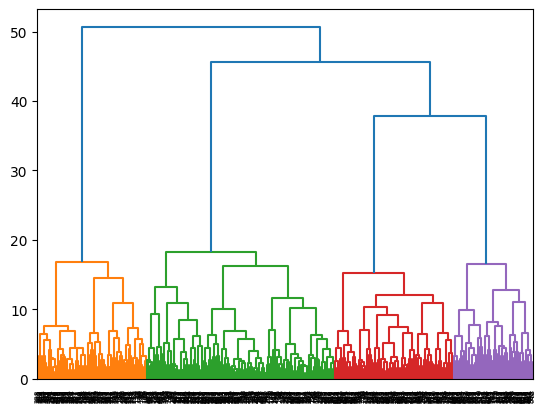

In [1247]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [1249]:
mdl_hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters_pred_hc = mdl_hc.fit_predict(X)

In [1250]:
X['cluster_hc'] = clusters_pred_hc

In [1251]:
X

,sex,cp,fbs,restecg,exang,age,trestbps,chol,thalch,oldpeak,clusters_kmeans,cluster_hc
0,0.517644,2.326639,2.253768,-1.566252,-0.797724,1.006574,0.704276,0.302947,0.489941,1.365839,2,2
1,0.517644,-0.818950,-0.443701,-1.566252,1.253566,1.431759,1.517244,0.789835,-1.179833,0.609717,1,3
2,0.517644,-0.818950,-0.443701,-1.566252,1.253566,1.431759,-0.650669,0.266200,-0.344946,1.649385,1,3
3,0.517644,1.278109,-0.443701,0.015507,-0.797724,-1.757133,-0.108691,0.459118,1.960932,2.500024,3,0
4,-1.931828,0.229580,-0.443701,-1.566252,-0.797724,-1.331947,-0.108691,0.036536,1.364584,0.515201,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-1.931828,-0.818950,2.253768,1.597267,-0.797724,0.049906,-0.271284,1.221604,0.648967,-0.808014,2,2
914,0.517644,2.326639,-0.443701,1.597267,-0.797724,0.900277,-0.108691,-0.560591,0.092375,-0.335437,3,0
915,0.517644,-0.818950,2.253768,1.597267,-0.797724,0.156202,-0.542273,0.211081,-1.497886,-0.808014,2,2
916,0.517644,-0.818950,2.253768,-1.566252,-0.797724,0.475092,-0.108691,1.699305,0.092375,-0.335437,2,2
